In [1]:
import pandas as pd 
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

In [3]:
data = pd.read_csv('E:\\iPython_Notebooks\Breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [6]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [5]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [8]:
count = data.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'count')

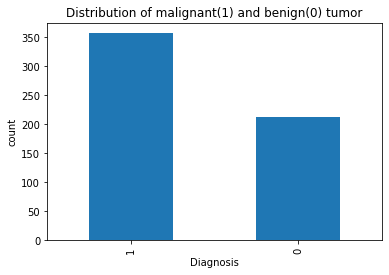

In [9]:
count.plot(kind = 'bar')
plt.title("Distribution of malignant(1) and benign(0) tumor")
plt.xlabel("Diagnosis")
plt.ylabel("count")


In [10]:
data['target'] = data['diagnosis'].map({0:'B',1:'M'})

In [11]:
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,target
0,17.99,10.38,122.80,1001.0,0.11840,0,B
1,20.57,17.77,132.90,1326.0,0.08474,0,B
2,19.69,21.25,130.00,1203.0,0.10960,0,B
3,11.42,20.38,77.58,386.1,0.14250,0,B
4,20.29,14.34,135.10,1297.0,0.10030,0,B


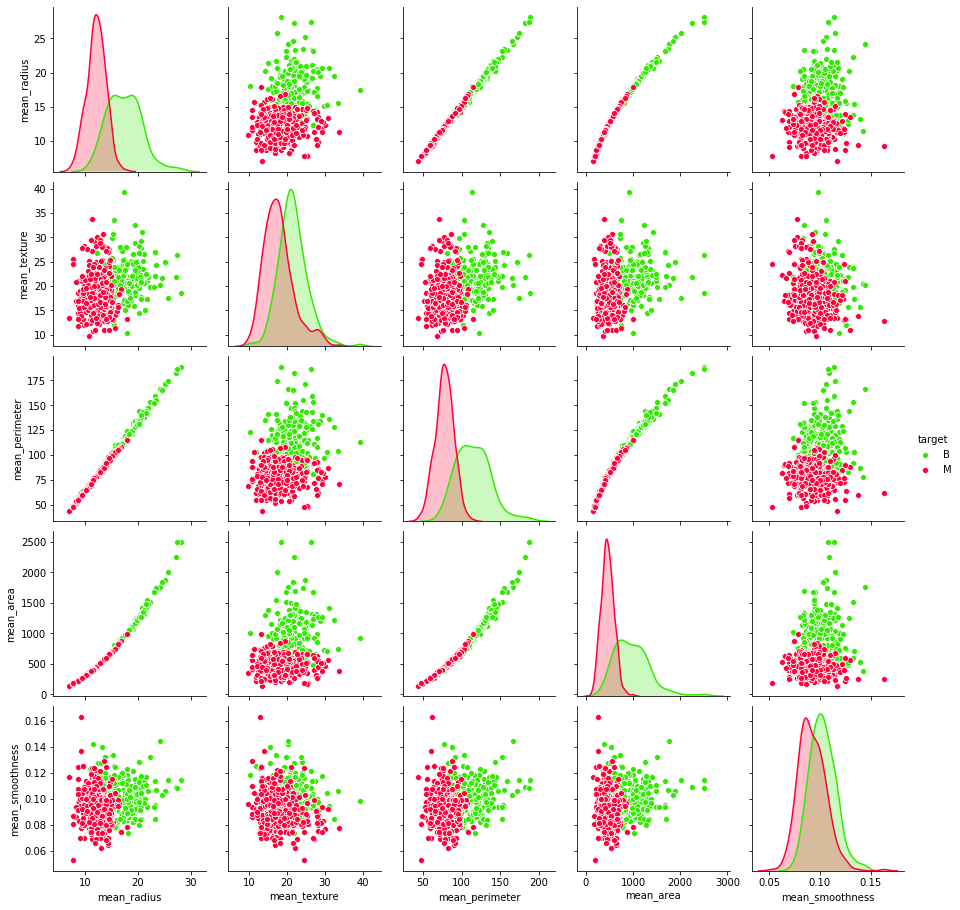

In [13]:
g = sns.pairplot(data.drop('diagnosis', axis = 1), hue="target", palette='prism');


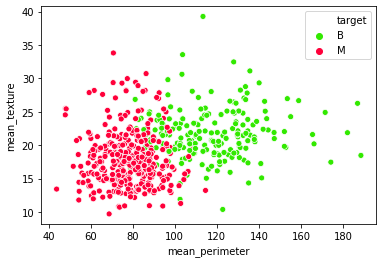

In [18]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = data, hue = 'target', palette='prism');

In [19]:
features = ['mean_perimeter', 'mean_texture']

In [26]:
x_features  = data[features]
y_target = data['target']

since we observe that mean_texture and mean_perimeter are most related to the output

In [21]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test= train_test_split(x_features, y_target, test_size=0.3, random_state = 42)

In [49]:
import numpy as np

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = model.predict(X_test)

In [33]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)

Accuracy score using Logistic Regression: 91.81286549707602


In [36]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
clf = KNeighborsClassifier()

In [55]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
y_pred = clf.predict(X_test)

In [62]:
acc = accuracy_score(y_test,y_pred)
print('test accuracy is:',acc*100)

test accuracy is: 0.9239766081871345
